In [1]:
import time
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.rcParams['font.family'] = 'Noto Sans CJK TC'
plt.rcParams['axes.unicode_minus'] = False

# A Revision on Traveler Salesman Problem

In [ ]:
# No code

# Data Collection

## (a)

In [4]:
dist_df = pd.read_excel("711_distance.xlsx", index_col=0)
dist_df

,新峨嵋,開寧,六福,鑫杭,新南,仁金,丹陽,稻江,榮金,建龍,...,教育大學,安松,合維,中廣,福中,嘉馥,道生,松聯,松高,光復
新峨嵋,0.000,0.766,0.791,3.167,4.829,3.892,3.491,6.331,8.031,5.897,...,8.747,4.843,6.817,4.502,9.711,9.365,7.201,8.513,7.827,8.639
開寧,0.551,0.000,0.255,2.537,4.199,3.261,2.860,5.424,7.124,5.283,...,7.846,4.337,6.231,3.872,9.391,9.045,6.881,8.194,7.507,8.320
六福,0.292,0.336,0.000,2.981,4.643,3.705,3.305,6.145,7.845,5.711,...,8.560,4.754,6.631,4.316,9.525,9.179,7.015,8.327,7.641,8.453
鑫杭,3.230,2.624,2.884,0.000,1.708,0.993,0.368,3.907,5.607,3.563,...,4.219,2.179,3.812,1.379,8.053,6.162,5.543,4.337,6.169,4.257
新南,4.544,3.487,4.259,1.440,0.000,0.994,1.317,4.164,4.558,3.367,...,3.751,1.956,2.745,0.621,7.528,5.095,5.018,3.887,5.644,3.190
仁金,4.833,3.306,3.566,0.897,1.005,0.000,1.068,4.271,4.834,3.643,...,3.437,2.219,3.029,0.597,6.388,5.379,5.308,4.150,5.934,3.474
丹陽,3.440,2.835,3.095,0.895,1.335,0.930,0.000,4.189,5.889,4.053,...,3.846,2.629,3.439,1.006,8.401,5.789,5.891,4.560,6.517,3.884
稻江,4.830,4.225,4.484,3.248,4.034,3.097,3.419,0.000,1.850,2.025,...,7.049,4.180,5.994,3.705,8.508,8.312,5.998,6.339,6.624,6.434
榮金,6.305,6.113,6.020,4.753,5.333,4.926,5.248,1.830,0.000,0.980,...,6.725,3.857,5.671,4.270,8.498,7.411,4.779,5.429,5.719,5.506
建龍,6.181,4.857,5.117,3.881,4.398,3.730,4.052,2.002,0.980,0.000,...,5.790,2.271,4.397,3.046,7.555,6.372,3.741,4.390,5.671,4.467


In [5]:
location_df = pd.read_excel('others/7-11_location.xlsx')
location_df.head(3)

,Node #,Store Name,Store ID,Store Address,latitude,longitude
0,0,新峨嵋,214397,台北市萬華區峨嵋街111之2號之3號,25.044326,121.503896
1,1,開寧,922197,台北市萬華區西寧南路16號,25.046366,121.506873
2,2,六福,136406,台北市萬華區漢口街二段73號1樓,25.046143,121.505054


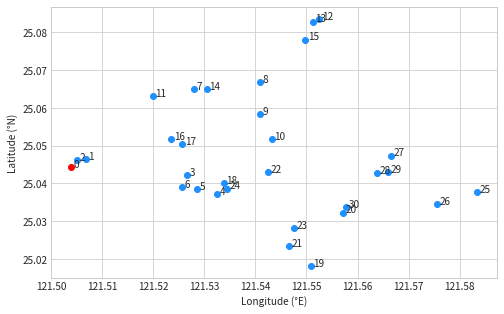

In [6]:
node = list(location_df['Node #'])
lat = np.array(location_df['latitude'])
lon = np.array(location_df['longitude'])

plt.figure(figsize=(8, 5))
plt.scatter(lon[0], lat[0], color='red')
plt.text(lon[0]+0.0005, lat[0]+0.00001, node[0])

for i in range(1, 31):
    plt.scatter(lon[i], lat[i], color='dodgerblue')
    plt.text(lon[i]+0.0005, lat[i]+0.00001, node[i])

plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.show()

# A Start Initialization by Rejection Sampling.

## (a) 
First, we need to know the size of our domain. Assume a computer can enumerate at most 0.5 billion sequences of random order. How many distinct nodes it can actually handle (not including the starting and ending nodes) in the path?

In [7]:
import math
n = 1
while math.factorial(n+1) < (5*10**8):
    n += 1

print(n)

12


## (b) 
Write a simple program to generate a sequence of random order from 01 to 30.

In [8]:
def generate_random_seq():
    return np.random.permutation(range(1, 31))

## (c) 
Generate 1000 sequences and calculate their distances (NOTE: start from Node 00, through the path, and back to Node 00). Report their average distances and set it as the threshold.

In [9]:
distance_data = np.array(dist_df)
city_data = list(dist_df.columns)

In [10]:
def get_dist(seq):
    seq0 = np.insert(seq, [0, len(seq)], [0, 0])
    return sum([distance_data[c1, c2] for c1, c2 in zip(seq0[:-1], seq0[1:])])

seq_list = [generate_random_seq()]
dist_list = [get_dist(s) for s in seq_list]

while len(dist_list) < 1000:
    seq = generate_random_seq()
    d = get_dist(seq)
    is_the_same = [(s == seq).all() for s in seq_list]
    if True not in is_the_same:
        dist_list.append(d)
        seq_list.append(seq)
    
threshold = sum(dist_list)/1000
threshold

153.7154499999999

## (d)
Initialization Step. Generate 1000 initial sequences with ”good” distances by the spirit of rejection sampling, i.e. if the generated sequence has shorter distance than the threshold, accept it, otherwise, do something to decide whether to accept it. 

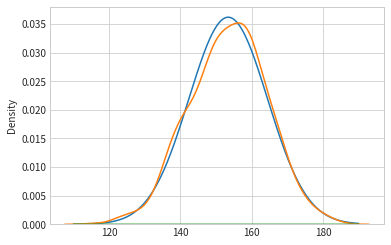

In [71]:
pz = lambda x: 1/(np.sqrt(2*np.pi)*std)*np.exp(-0.5*(x-threshold)**2/std**2)
x = np.arange(110, 190, 0.01)
y = pz(x)
plt.plot(x, y)
sns.kdeplot(dist_list)
            
x = np.arange(110, 190, 0.01)
y = qz(x)
plt.plot(x, y)

In [11]:
std = np.std(np.array(dist_list))
k = 1.5  # a constant
seq_list = []
while len(seq_list) < 1000:
    seq = generate_random_seq()
    d = get_dist(seq)
    is_the_same = [(seq == s).all() for s in seq_list] # 檢定重複
    if True not in is_the_same:
        if d < threshold:
            seq_list.append(seq)
        else:
            # a easy sample distribution : Gassian(threshold, std)
            qz = 1/(np.sqrt(2*np.pi)*std)*np.exp(-0.5*(d-threshold)**2/std**2)

            # target distribution: Gassian(threshold, std)
            pz = 1/(np.sqrt(2*np.pi)*std)*np.exp(-0.5*(d-threshold)**2/std**2)
            u = np.random.uniform(low = 0, high = k*qz)

            if pz >= u:  # 接受採樣
                seq_list.append(seq)

# An Implementation of Known Metaheuristic Methods.

## (c) 
Submit two workable functions that input the distance matrix and all necessary parameters, and output the optimal sequence with its distance.

### Genetic Algorithm

In [73]:
class Genetic_algorithm:
    def __init__(self, distance_array, iteration, mutation_prop):
        self.distance_array = distance_array
        self.pop_list = None
        self.iteration = iteration
        self.mutation_prop = mutation_prop
        self.population_size = 1000
        self.total_GA = []
    
    def get_dist(self, seq):
        seq0 = np.insert(seq, [0, len(seq)], [0, 0])
        return sum([self.distance_array[c1, c2] for c1, c2 in zip(seq0[:-1], seq0[1:])])
    
    def roulette_wheel_selection(self):
        list_ = self.pop_list.copy()
        selection = []
        for _ in range(2):
            fitness_ls = [self.get_dist(ind) for ind in list_]
            f_sum = sum(fitness_ls)
            probability = [f/f_sum for f in fitness_ls]
            p = np.random.random_sample()
            sum_prob = 0
            for i, prob in enumerate(probability):
                sum_prob += prob
                if sum_prob >= p:
                    target = list_.pop(i)
                    selection.append(target)
                    break
        return selection[0], selection[1]
    
    def uniform_crossover(self, gp_1, gp_2):
        index = int(np.random.choice(len(gp_1), 1))
        new_gp_1, new_gp_2 = gp_1[:index], gp_2[:index]
        ls_1, ls_2 = [], []
        for g1, g2 in zip(gp_1[index:], gp_2[index:]):
            ls_1.append( (int(np.where(gp_2==g1)[0]), g1) )
            ls_2.append( (int(np.where(gp_1==g2)[0]), g2) )
        ls_1 = np.array([g for (i, g) in sorted(ls_1)])
        ls_2 = np.array([g for (i, g) in sorted(ls_2)])
        new_gp_1 = np.concatenate((new_gp_1, ls_1))
        new_gp_2 = np.concatenate((new_gp_2, ls_2))
        return new_gp_1, new_gp_2
    
    def mutation(self, gp, point=5):
        # mutation for 排列編碼，隨機選取 {point} 個點，將其向左一個位置做交換
        index = np.random.choice(len(gp), 5, replace=False)
        index = np.insert(index, [len(index)], [index[0]])
        new_gp = gp.copy()
        for i, j in zip(index[:-1], index[1:]):
            new_gp[i] = gp[j]
        return new_gp

    def select_candidata(self, seq_list):
        # 產生 population list: 從範圍內挑選 {self.population_size} 個
        if self.population_size < len(seq_list):
            candidata = np.random.choice(range(len(seq_list)), self.population_size)
            self.pop_list = [seq_list[i] for i in candidata]
        else:
            self.pop_list = seq_list
        self.best_y = max([self.get_dist(ind) for ind in self.pop_list])
        self.total_GA = [self.best_y]
        
    def main_program(self, seq_list):
        self.select_candidata(seq_list)
        i = 0
        while i < self.iteration:
            (gp_1, gp_2) = self.roulette_wheel_selection()
            new_gp_1, new_gp_2 = self.uniform_crossover(gp_1, gp_2)
            if np.random.random_sample() < self.mutation_prop:
                new_gp_1 = self.mutation(new_gp_1)
                new_gp_2 = self.mutation(new_gp_2)
            
            candidate = [self.get_dist(gp) for gp in [gp_1, gp_2, new_gp_1, new_gp_2]]
            min_value = [[k, v] for k, v in enumerate(candidate) if v==min(candidate)][0]
            
            if min_value[0] > 1:
                replacement = []
                for ind in self.pop_list:
                    if (ind == gp_1).all():
                        replacement.append(new_gp_1)
                    elif (ind == gp_2).all():
                        replacement.append(new_gp_2)
                    else:
                        replacement.append(ind)
                self.pop_list = replacement
                
                if min_value[1] < self.best_y:
                    if min_value[0] == 2:
                        self.best_x, self.best_y = new_gp_1, min_value[1]
                    elif min_value[0] == 3:
                        self.best_x, self.best_y = new_gp_2, min_value[1]
            i += 1
            self.total_GA.append(self.best_y)

### Simulated Annealing

In [74]:
class Simulated_annealing:
    def __init__(self, distance_array, iteration):
        self.distance_array = distance_array
        self.iteration = iteration
        self.total_SA = []
        self.final_T = 1e-100
        self.best_y = None

    def get_dist(self, seq):
        seq0 = np.insert(seq, [0, len(seq)], [0, 0])
        return sum([self.distance_array[c1, c2] for c1, c2 in zip(seq0[:-1], seq0[1:])])
    
    def getTemp(self, t):
        return 0.98*self.T_0
    
    def move_a_step(self, order):
        order0 = order.copy()
        index = np.random.choice(len(order), 5, replace=False)
        index = np.insert(index, [len(index)], [index[0]])
        for i, j in zip(index[:-1], index[1:]):
            order0[i] = order[j]
        return order0
    
    def main_program(self, seq_list):
        for ind in seq_list:
            random_seq_sample = [seq_list[np.random.choice(range(len(seq_list)))] for _ in range(10)]
            self.T_0 = np.mean([self.get_dist(s) for s in random_seq_sample])
            d = self.get_dist(ind)
            if self.best_y == None:
                self.best_x, self.best_y = ind, d
            t = 0
            while (t < self.iteration) and (self.T_0 > self.final_T):
                new_ind = self.move_a_step(ind)
                new_y = self.get_dist(new_ind)
                dE = new_y - d
                if dE <= 0: # 直接接受新解
                    ind, d = new_ind, new_y
                    if new_y < self.best_y:  # 更新最佳解
                        self.best_x, self.best_y = new_ind, new_y
                else:
                    if np.random.random_sample() < np.exp(-dE/self.T_0):
                        ind, d = new_ind, new_y
                self.T_0 = self.getTemp(t) #降溫
                t += 1
            self.total_SA.append(self.best_y)

## (d) 
Write down in text the suggested paths (optimal sequences) by two algorithms, together with their distances and the computing time.

### Genetic Algorithm

In [75]:
distance_data = np.array(dist_df)
city_data = list(dist_df.columns)

In [80]:
start = time.perf_counter()
GA = Genetic_algorithm(distance_data, iteration=1000, mutation_prop=0.5)
GA.main_program(seq_list)
time_consuming = time.perf_counter() - start

route_id = np.insert(GA.best_x, [0, len(GA.best_x)], [0, 0])
best_route = ' → '.join([city_data[i] for i in route_id])

print(f"\
Time consuming: {time_consuming}\n\n\
The best route: {best_route}\n\n\
The total distance: {GA.best_y}\
")

Time consuming: 72.6316799999986

The best route: 新峨嵋 → 復昌 → 合維 → 教育大學 → 開寧 → 六福 → 吉安 → 榮金 → 稻江 → 威克 → 道生 → 安松 → 光復 → 松聯 → 建龍 → 永明 → 明水 → 鑫杭 → 濟南 → 中廣 → 金蓬 → 六條通 → 丹陽 → 仁金 → 黎元 → 嘉馥 → 福中 → 明美 → 松高 → 新南 → 天津 → 新峨嵋

The total distance: 109.68000000000002


### Simulated Annealing

In [79]:
start = time.perf_counter()
SA = Simulated_annealing(distance_data, iteration=1000)
SA.main_program(seq_list)
time_consuming = time.perf_counter() - start

route_id = np.insert(SA.best_x, [0, len(SA.best_x)], [0, 0])
best_route = ' → '.join([city_data[i] for i in route_id])

print(f"\
Time consuming: {time_consuming}\n\n\
The best route: {best_route}\n\n\
The total distance: {SA.best_y}\
")

Time consuming: 79.89232829999673

The best route: 新峨嵋 → 開寧 → 丹陽 → 新南 → 教育大學 → 黎元 → 合維 → 光復 → 嘉馥 → 復昌 → 濟南 → 中廣 → 松高 → 松聯 → 道生 → 福中 → 仁金 → 鑫杭 → 安松 → 威克 → 吉安 → 稻江 → 榮金 → 建龍 → 明水 → 永明 → 明美 → 金蓬 → 六條通 → 天津 → 六福 → 新峨嵋

The total distance: 67.863


# Summary and Discussion. (10 points)

## The best distance vs. iterations plot.

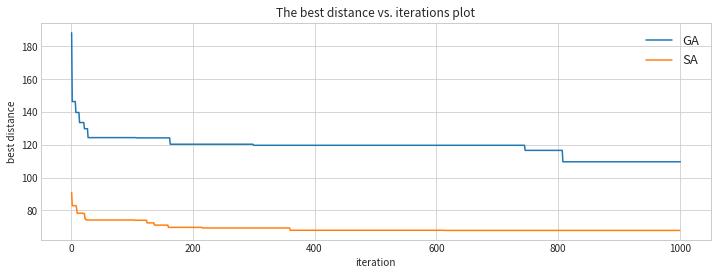

In [81]:
plt.figure(figsize=(12, 4))
plt.plot([i + 1 for i in range(len(GA.total_GA))], GA.total_GA, label='GA')
plt.plot([i + 1 for i in range(len(SA.total_SA))], SA.total_SA, label='SA')

plt.xlabel("iteration")
plt.ylabel("best distance")
plt.title("The best distance vs. iterations plot")
plt.legend(fontsize=13)

##  Illustration of route path

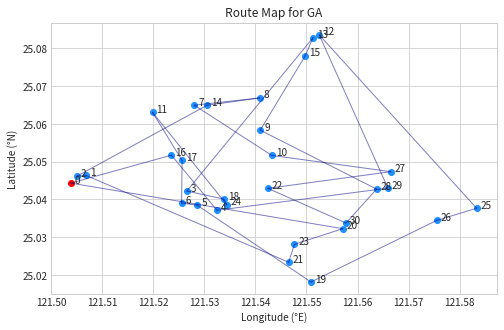

In [82]:
node = list(location_df['Node #'])
lat = np.array(location_df['latitude'])
lon = np.array(location_df['longitude'])
route_id = np.insert(GA.best_x, [0, len(GA.best_x)], [0, 0])

ax = plt.figure(figsize=(8, 5))
plt.scatter(lon[0], lat[0], color='red')
plt.text(lon[0]+0.0008, lat[0]+0.00002, node[0])

for i in range(1, 31):
    plt.scatter(lon[i], lat[i], color='dodgerblue')
    plt.text(lon[i]+0.0008, lat[i]+0.00002, node[i])
for id_ in range(len(route_id)-1):
    i, j = route_id[id_], route_id[id_+1]
    plt.plot([lon[i], lon[j]], [lat[i], lat[j]], 
             color='navy', linewidth=1, alpha=0.5)

plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('Route Map for GA')
plt.show()

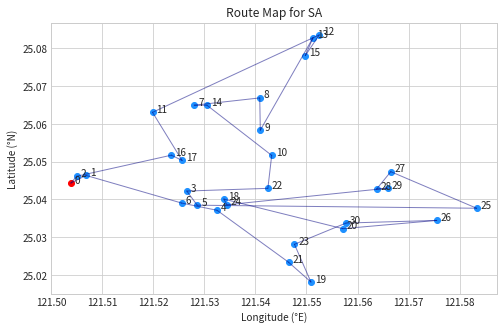

In [83]:
node = list(location_df['Node #'])
lat = np.array(location_df['latitude'])
lon = np.array(location_df['longitude'])
route_id = np.insert(SA.best_x, [0, len(SA.best_x)], [0, 0])

ax = plt.figure(figsize=(8, 5))
plt.scatter(lon[0], lat[0], color='red')
plt.text(lon[0]+0.0008, lat[0]+0.00002, node[0])

for i in range(1, 31):
    plt.scatter(lon[i], lat[i], color='dodgerblue')
    plt.text(lon[i]+0.0008, lat[i]+0.00002, node[i])
for id_ in range(len(route_id)-1):
    i, j = route_id[id_], route_id[id_+1]
    plt.plot([lon[i], lon[j]], [lat[i], lat[j]], 
             color='navy', linewidth=1, alpha=0.5)

plt.xlabel('Longitude (°E)')
plt.ylabel('Latitude (°N)')
plt.title('Route Map for SA')
plt.show()